# Time Series using Python

## Models
1. Naive Approach
2. Moving Average
3. Simple Exponential Smoothing
4. Holts Linear Trend Model
5. Holts Winter Model
6. ARIMA
7. SARIMAX

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Train_SU63ISt.csv")
test = pd.read_csv("Test_0qrQsBZ.csv")

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [5]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

In [6]:
train.shape, test.shape

((18288, 3), (5112, 2))

### Feature Extraction

In [7]:
train["Datetime"] = pd.to_datetime(train.Datetime, format ="%d-%m-%Y %H:%M")
test["Datetime"] = pd.to_datetime(test.Datetime, format ="%d-%m-%Y %H:%M")
train_original["Datetime"] = pd.to_datetime(train_original.Datetime, format ="%d-%m-%Y %H:%M")
test_original["Datetime"] = pd.to_datetime(test_original.Datetime, format ="%d-%m-%Y %H:%M")

In [8]:
for i in (train, test, test_original, train_original):
    i["year"] = i.Datetime.dt.year
    i["month"] = i.Datetime.dt.month
    i["day"] = i.Datetime.dt.day
    i["Hour"] = i.Datetime.dt.hour

In [9]:
train["day of week"] = train["Datetime"].dt.dayofweek
temp = train["Datetime"]

In [10]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [11]:
temp2 = train["Datetime"].apply(applyer)
train["weekend"] = temp2
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


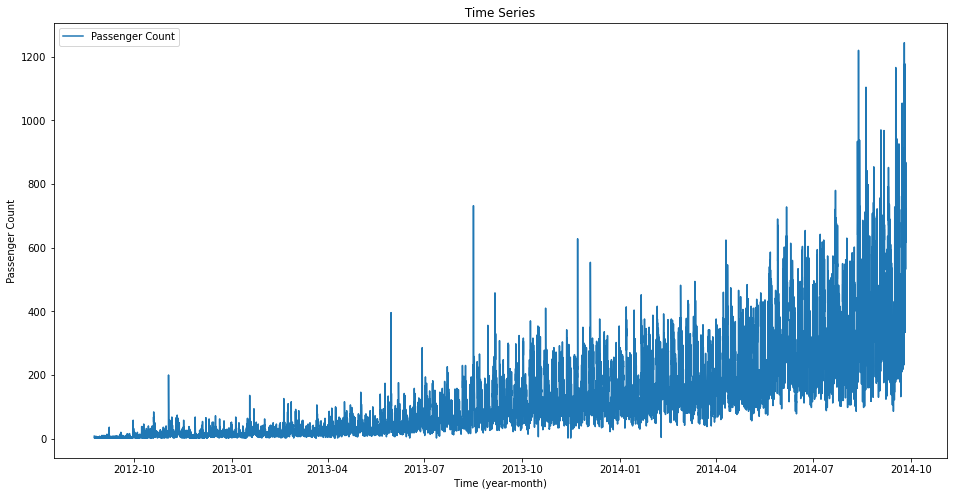

In [12]:
train.index = train["Datetime"]
df = train.drop("ID",1)

ts = df["Count"]

plt.figure(figsize=(16,8))
plt.plot(ts,label="Passenger Count")
plt.title(" Time Series ")
plt.xlabel(" Time (year-month) ")
plt.ylabel(" Passenger Count ")
plt.legend(loc="best")

There is a Trend -- number of count is increasing

### Exploratory Analysis

<AxesSubplot:xlabel='year'>

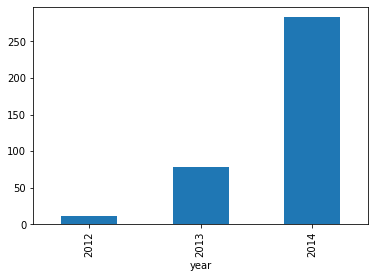

In [13]:
train.groupby("year")["Count"].mean().plot.bar()

<AxesSubplot:xlabel='month'>

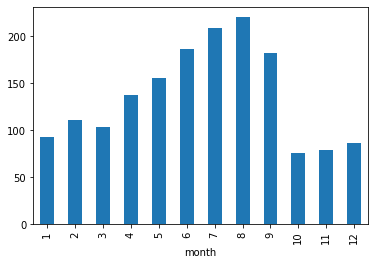

In [14]:
train.groupby("month")["Count"].mean().plot.bar()

year  month
2012  8         2.952381
      9         4.444444
      10       10.986559
      11       15.827778
      12       15.680108
Name: Count, dtype: float64


<AxesSubplot:title={'center':'Passenger COunt (Monthwise)'}, xlabel='year,month'>

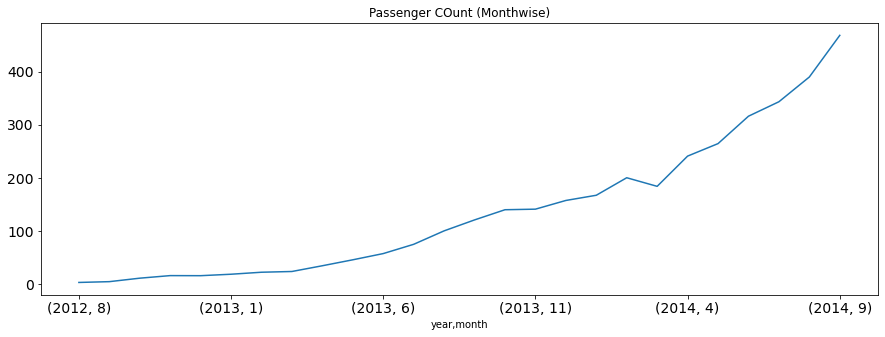

In [15]:
temp = train.groupby(["year","month"])["Count"].mean()
print(temp.head())
temp.plot(figsize=(15,5), title = "Passenger COunt (Monthwise)",fontsize=14)

<AxesSubplot:xlabel='day'>

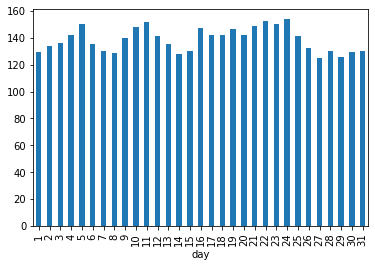

In [16]:
train.groupby("day")["Count"].mean().plot.bar()

Not much inference

<AxesSubplot:xlabel='Hour'>

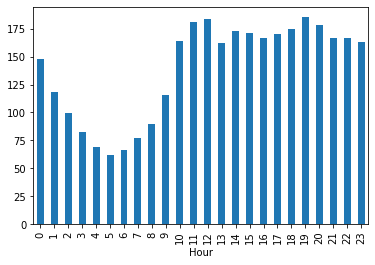

In [17]:
train.groupby("Hour")["Count"].mean().plot.bar()

Peak traffic is at 7PM and decreasing trend till 5 AM

After that passenger count increasing again and peaks again between 11AM - 12NN

<AxesSubplot:xlabel='weekend'>

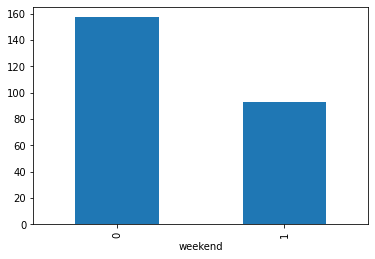

In [18]:
train.groupby("weekend")["Count"].mean().plot.bar()

Traffic is more on weekdays compared to weekends

<AxesSubplot:xlabel='day of week'>

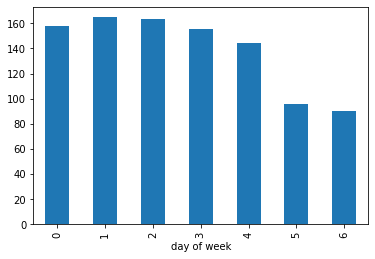

In [19]:
train.groupby("day of week")["Count"].mean().plot.bar()

Passenger is less for Saturday (5) and Sunday (6) as compared to other days

In [20]:
train = train.drop("ID",1)

In [21]:
train.Timestamp = pd.to_datetime(train.Datetime, format ="%d-%m-%Y %H:%M")
train.index = train.Timestamp

hourly = train.resample("H").mean()
daily = train.resample("D").mean()
weekly = train.resample("W").mean()
monthly = train.resample("M").mean()

<AxesSubplot:title={'center':'Monthly'}, xlabel='Datetime'>

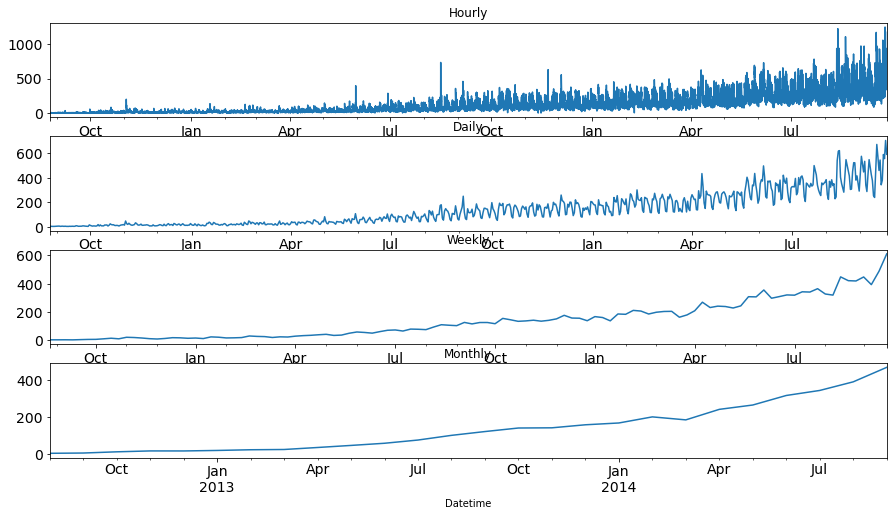

In [22]:
fig, axs = plt.subplots(4,1)

hourly.Count.plot(figsize=(15,8), 
                  title="Hourly",
                  fontsize=14,
                  ax=axs[0])

daily.Count.plot(figsize=(15,8), 
                  title="Daily",
                  fontsize=14,
                  ax=axs[1])

weekly.Count.plot(figsize=(15,8), 
                  title="Weekly",
                  fontsize=14,
                  ax=axs[2])

monthly.Count.plot(figsize=(15,8), 
                  title="Monthly",
                  fontsize=14,
                  ax=axs[3])
                  

In [23]:
test.Timestamp = pd.to_datetime(test.Datetime,format="%d-%m-%Y %H:%M")
test.index= test.Timestamp

test = test.resample("D").mean()

train.Timestamp = pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")
train.index= train.Timestamp

train = train.resample("D").mean()

### Splitting into Training-Validation

In [24]:
Train = train["2012-08-25":"2014-06-24"]
valid = train["2014-06-25":"2014-09-25"]

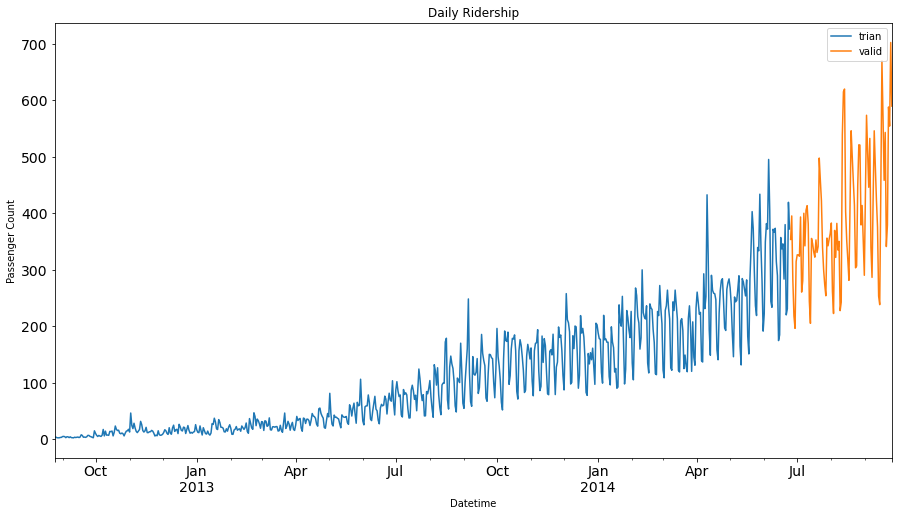

In [25]:
Train.Count.plot(figsize=(15,8),
                title="Daily Ridership",
                fontsize = 14,
                label = "trian")

valid.Count.plot(figsize=(15,8),
                title="Daily Ridership",
                fontsize = 14,
                label = "valid")

plt.xlabel("Datetime")
plt.ylabel("Passenger Count")
plt.legend(loc="best")
plt.show()

## Models
1. Naive Approach
2. Moving Average
3. Simple Exponential Smoothing
4. Holts Linear Trend Model
5. Holts Winter Model
6. ARIMA
7. SARIMAX

### Naive Appraoch

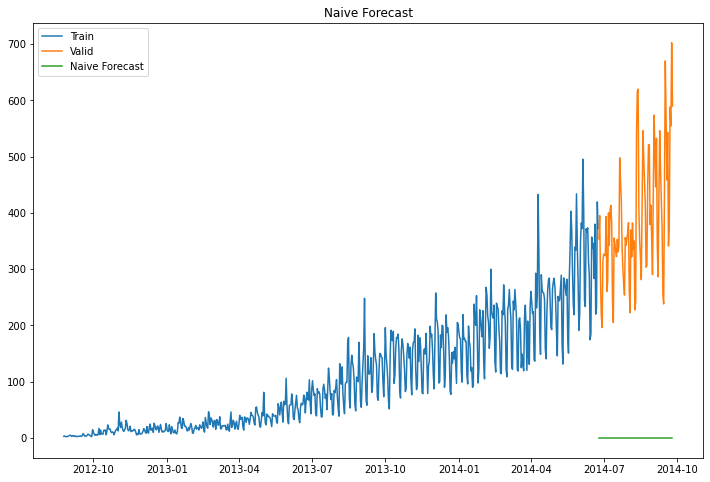

In [26]:
dd = np.asarray(Train.count)
y_hat = valid.copy()
y_hat["naive"] = dd.size-1

plt.figure(figsize=(12,8))
plt.plot(Train.index, Train["Count"], label="Train")
plt.plot(valid.index, valid["Count"], label="Valid")
plt.plot(y_hat.index, y_hat["naive"], label="Naive Forecast")

plt.title("Naive Forecast")
plt.legend(loc="best")
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
rms

404.66634946666994

Not Suitable

### Moving Average

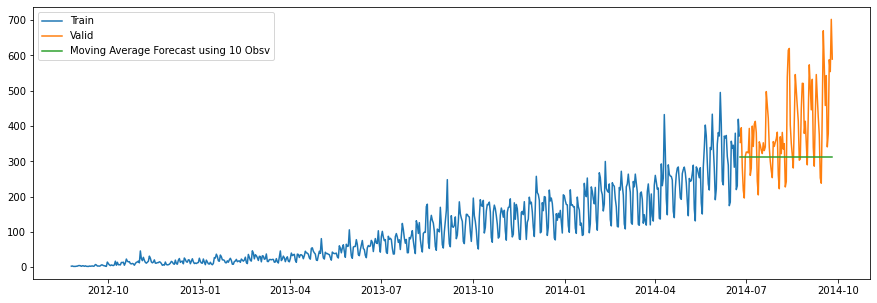

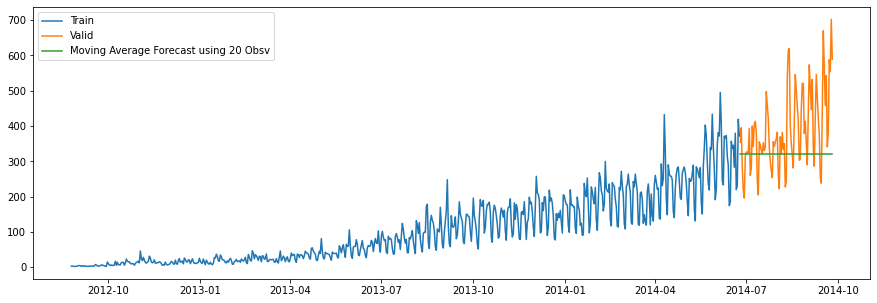

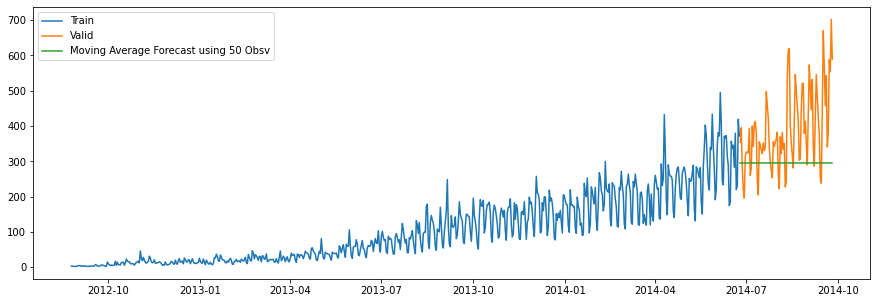

In [28]:
y_hat_avg = valid.copy()

#Average of Last 10 Observations
y_hat_avg["moving_avg_forecast"] = Train["Count"].rolling(10).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(Train["Count"] , label="Train")
plt.plot(valid["Count"] , label="Valid")
plt.plot(y_hat_avg["moving_avg_forecast"] , label="Moving Average Forecast using 10 Obsv")

plt.legend(loc="best")
plt.show()

y_hat_avg=  valid.copy()

#Average of Last 20 Observations
y_hat_avg["moving_avg_forecast"] = Train["Count"].rolling(20).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(Train["Count"] , label="Train")
plt.plot(valid["Count"] , label="Valid")
plt.plot(y_hat_avg["moving_avg_forecast"] , label="Moving Average Forecast using 20 Obsv")

plt.legend(loc="best")
plt.show()

y_hat_avg=  valid.copy()

#Average of Last 50 Observations
y_hat_avg["moving_avg_forecast"] = Train["Count"].rolling(50).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(Train["Count"] , label="Train")
plt.plot(valid["Count"] , label="Valid")
plt.plot(y_hat_avg["moving_avg_forecast"] , label="Moving Average Forecast using 50 Obsv")

plt.legend(loc="best")
plt.show()


In [29]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.moving_avg_forecast))
rms

144.19175679986793

### Simple Exponential Smoothing

In [30]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

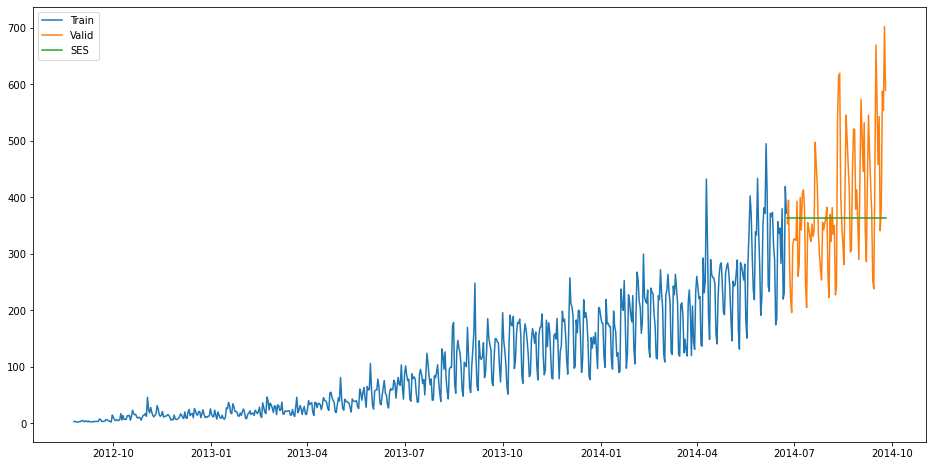

In [31]:
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train["Count"])).fit(smoothing_level=0.6,
                                                          optimized=False)

y_hat_avg["SES"] = fit2.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train["Count"] , label="Train")
plt.plot(valid["Count"] , label="Valid")
plt.plot(y_hat_avg["SES"], label="SES")
plt.legend(loc="best")
plt.show()
          
          

In [32]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.SES))
rms

113.43708111884514

### Holt's Linear Trend Model

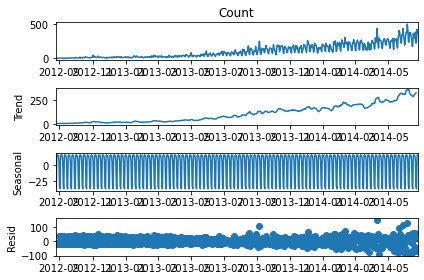

In [33]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(Train.Count).plot()

results = sm.tsa.stattools.adfuller(train.Count)
plt.show()

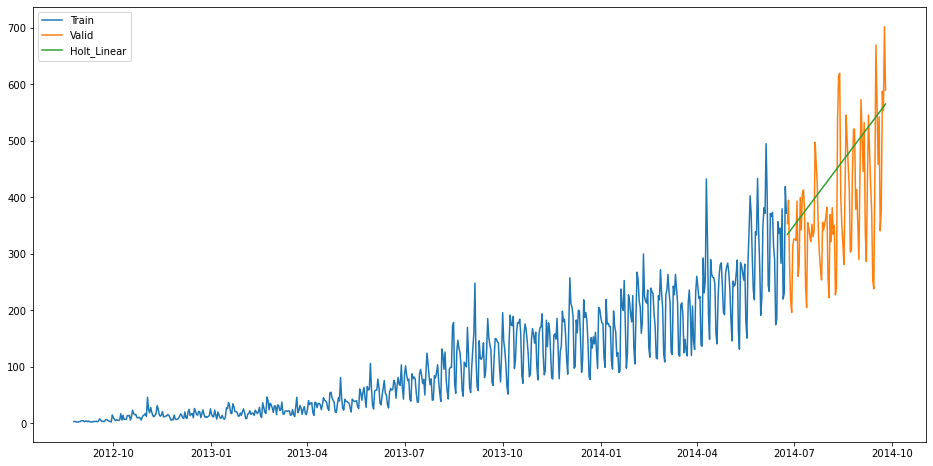

In [34]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train["Count"])).fit(smoothing_level = 0.3,
                                            smoothing_slope = 0.1)

y_hat_avg["Holt_linear"] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train["Count"] , label="Train")
plt.plot(valid["Count"] , label="Valid")
plt.plot(y_hat_avg["Holt_linear"], label="Holt_Linear")
plt.legend(loc="best")
plt.show()


In [35]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_linear))
rms

112.94278345314041

In [36]:
predict = fit1. forecast(len(test))

In [37]:
test["prediction"] = predict

In [38]:
train_original["ratio"] = train_original["Count"]/ train_original["Count"].sum()

In [39]:
temp = train_original.groupby(["Hour"])["ratio"].sum()

In [40]:
pd.DataFrame(temp, columns=["Hour", "ratio"]).to_csv("GROUPby.csv")

In [41]:
temp2 = pd.read_csv("GROUPby.csv")
temp2 = temp2.drop("Hour.1",1)

In [42]:
merge = pd.merge(test, test_original, on=("day","month", "year"),
                 how="left")

merge["Hour"] = merge["Hour_y"]

merge = merge.drop(["year", "month", "Datetime", "Hour_x", "Hour_y"], axis=1)

In [43]:
prediction = pd.merge(merge, temp2, on="Hour", how="left")

In [44]:
prediction["Count"] = prediction["prediction"] * prediction["ratio"] * 24
prediction["ID"] = prediction["ID_y"]

In [45]:
submission = prediction.drop(["ID_x", "day","ID_y", "prediction", "Hour", "ratio"],axis=1)


pd.DataFrame(submission, columns=["ID", "Count"]).to_csv("Holtlinear.csv")

### Holt Winter's Model on Daily Time Series

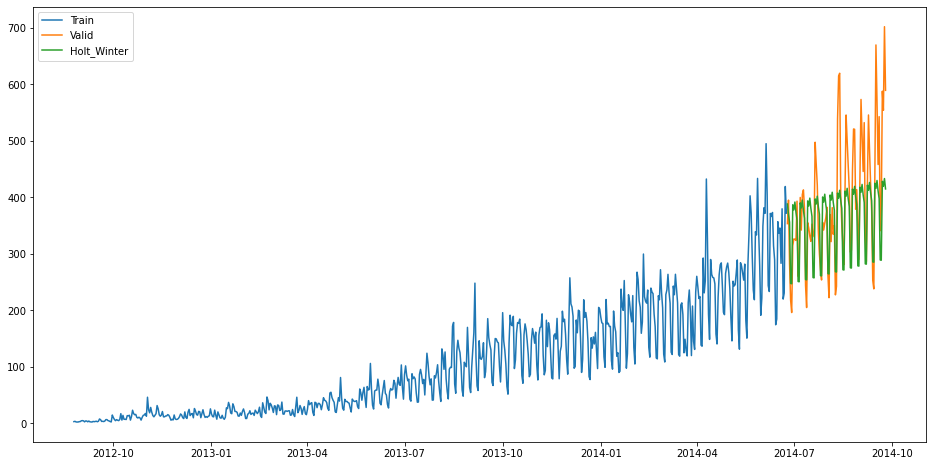

In [46]:
y_hat_avg = valid.copy()

fit1 = ExponentialSmoothing(np.asarray(Train["Count"]),
                            seasonal_periods = 7,
                            trend="add",
                            seasonal = "add",).fit()

y_hat_avg["Holt_Winter"] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train["Count"] , label="Train")
plt.plot(valid["Count"] , label="Valid")
plt.plot(y_hat_avg["Holt_Winter"], label="Holt_Winter")
plt.legend(loc="best")
plt.show()
          

In [47]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_Winter))
rms

82.12366049881427

In [48]:
predict = fit1.forecast(len(test))

test["prediction"] = predict

In [49]:
merge = pd.merge(test, test_original, on=("day","month","year"),
                 how="left")

merge["Hour"] = merge["Hour_y"]

merge= merge.drop(["year","month","Datetime","Hour_x","Hour_y"],axis=1)
merge.head()

,ID_x,day,prediction,ID_y,Hour
0,18299.5,26.0,388.43698,18288,0
1,18299.5,26.0,388.43698,18289,1
2,18299.5,26.0,388.43698,18290,2
3,18299.5,26.0,388.43698,18291,3
4,18299.5,26.0,388.43698,18292,4


In [50]:
prediction = pd.merge(merge, temp2, on="Hour", how="left")
prediction["Count"] = prediction["prediction"] * prediction["ratio"] * 24

prediction["ID"] = prediction["ID_y"]

submission = prediction.drop(["day","Hour","ratio","prediction","ID_x", "ID_y"], axis=1)


In [51]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_Winter))
rms

82.12366049881427

In [52]:
prediction = fit1.forecast(len(test))
test["prediction"] = predict

In [53]:
merge = pd.merge(test, test_original, on=("day", "month", "year"), how = "left")

merge["Hour"] = merge["Hour_y"]

merge = merge.drop(["year", "month", "Datetime", "Hour_x", "Hour_y"], axis=1)

In [54]:
prediction = pd.merge(merge, temp2, on="Hour", how="left")

prediction["Count"] = prediction["prediction"] * prediction["ratio"] *24

prediction["ID"] = prediction["ID_y"]

submission = prediction.drop(["day", "Hour", "ratio", "prediction", "ID_x", "ID_y"], axis=1)

In [55]:
pd.DataFrame(submission, columns=["ID","Count"]).to_csv("Holtwinters.csv")

### Parameters Tuning for ARIMA Model

In [56]:
from statsmodels.tsa.stattools import adfuller

In [57]:
def test_stationarity(timeseries):
    
    rolmean = train_original.rolling(24).mean()
    rolstd = train_original.rolling(24).std()
    
    orig = plt.plot(timeseries, color="blue", label="Original")
    mean = plt.plot(rolmean, color="red", label = "Rolling Mean")
    std = plt.plot(rolstd , color="black", label = "Rolling Std")
    
    plt.legend(loc="best")
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)
    
    print("Results of Dickey-Fuller Test: ")
    
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", 
                                             "p-value","#Lags Used", 
                                             "Number of Observations Used"])
    
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)" %key] = value
        
    print(dfoutput)
                         

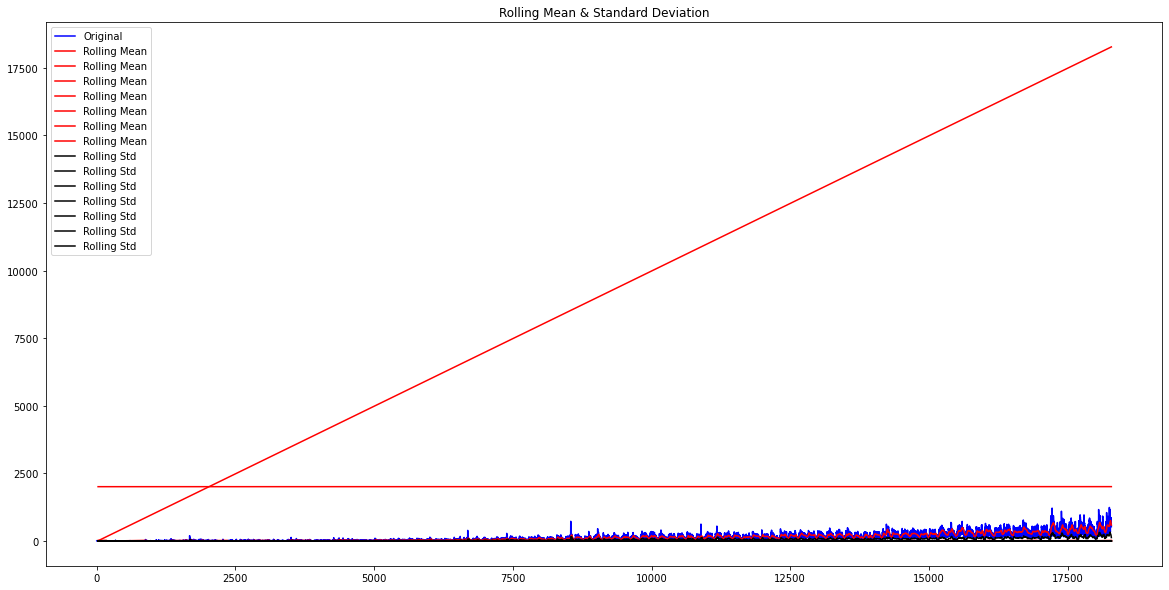

Results of Dickey-Fuller Test: 
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [58]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 20,10

test_stationarity(train_original["Count"])

### Removing Trend

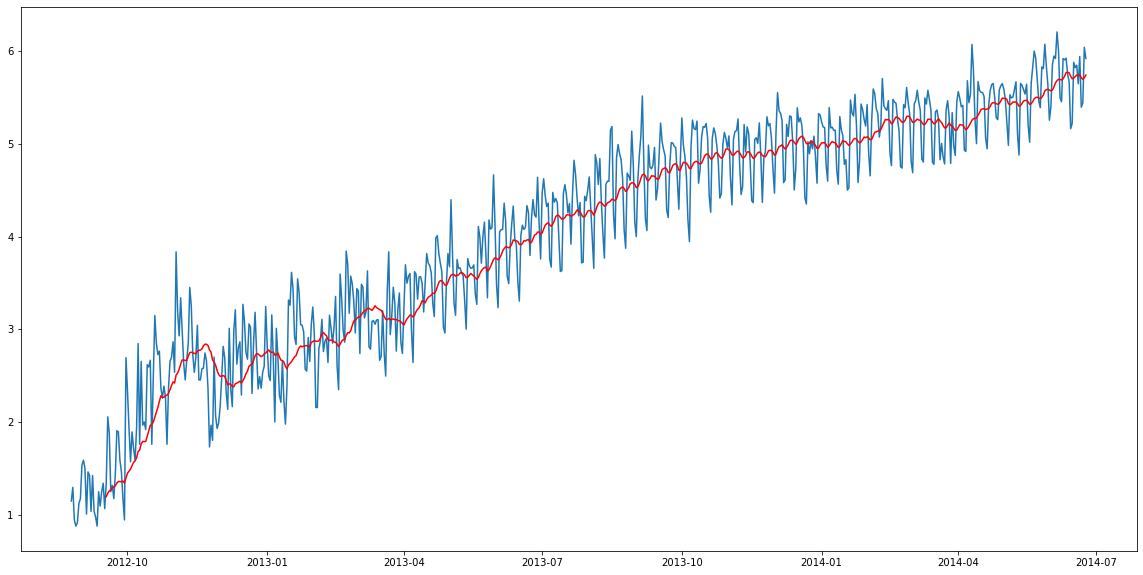

In [59]:
Train_log = np.log(Train["Count"])
valid_log = np.log(valid["Count"])

# Window Size = 24, hours per day
moving_avg = Train_log.rolling(24).mean()

plt.plot(Train_log)
plt.plot(moving_avg, color="red")
plt.show()

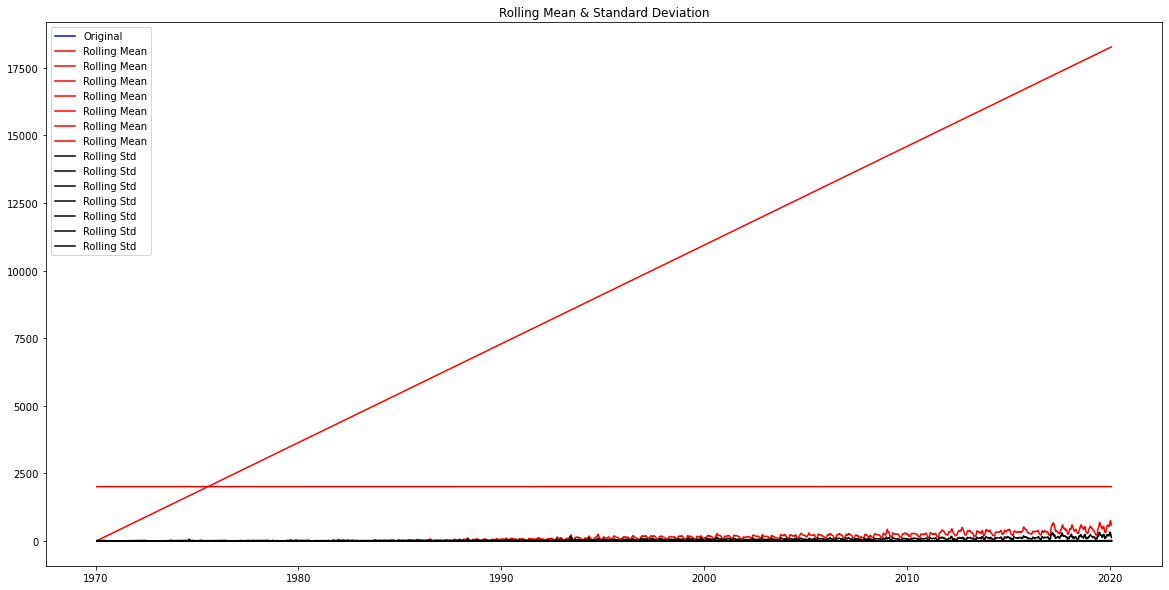

Results of Dickey-Fuller Test: 
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [60]:
train_log_moving_avg_diff = Train_log - moving_avg
train_log_moving_avg_diff.dropna(inplace=True)

test_stationarity(train_log_moving_avg_diff)

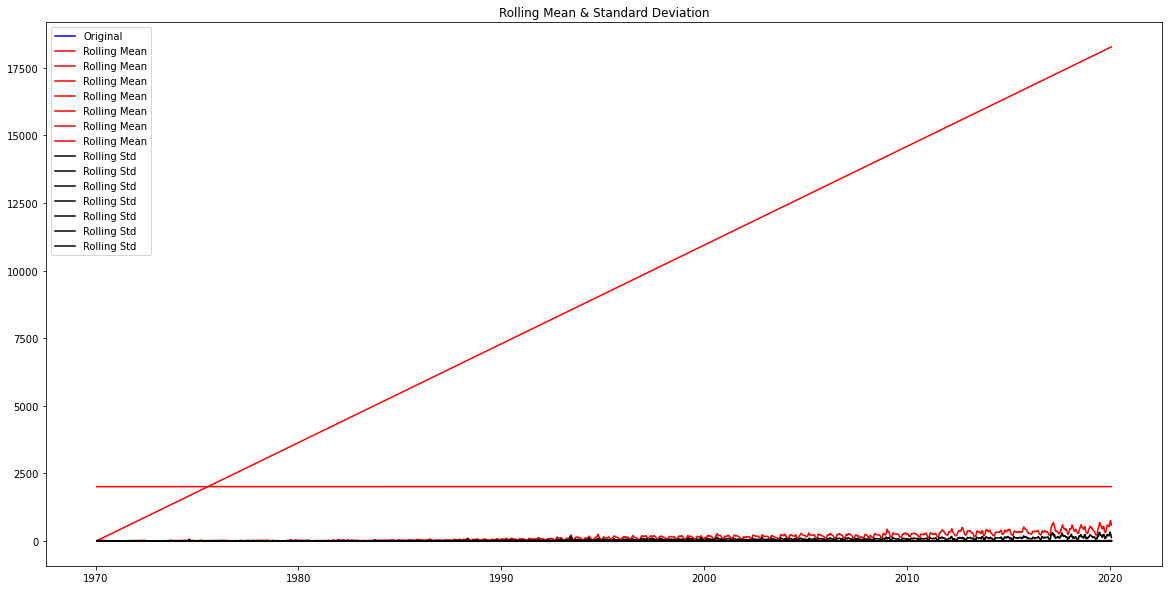

Results of Dickey-Fuller Test: 
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [61]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

### Removing Seasonality

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

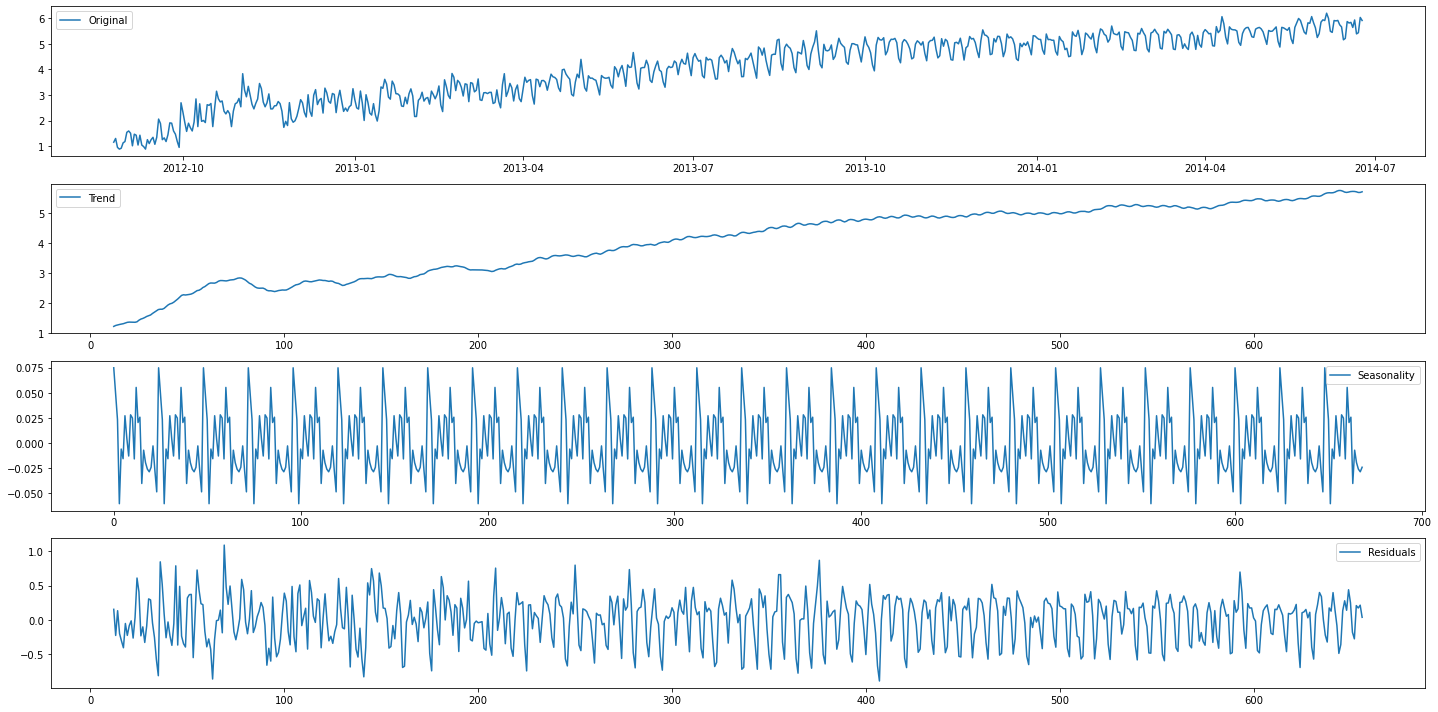

In [63]:
decomposition=  seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq= 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label="Original")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label="Seasonality")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

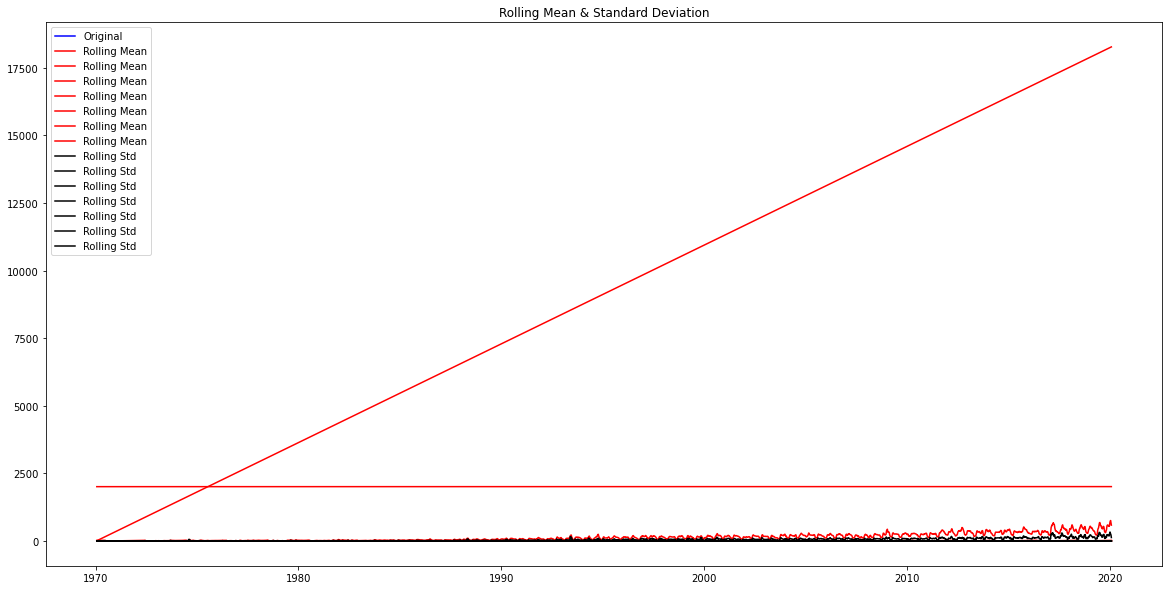

Results of Dickey-Fuller Test: 
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [94]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose["date"] = Train_log.index

train_log_decompose.set_index("date",inplace=True)
train_log_decompose.dropna(inplace=True)


test_stationarity(train_log_decompose[0])

### ACF and PACF Plot

In [65]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method="ols")

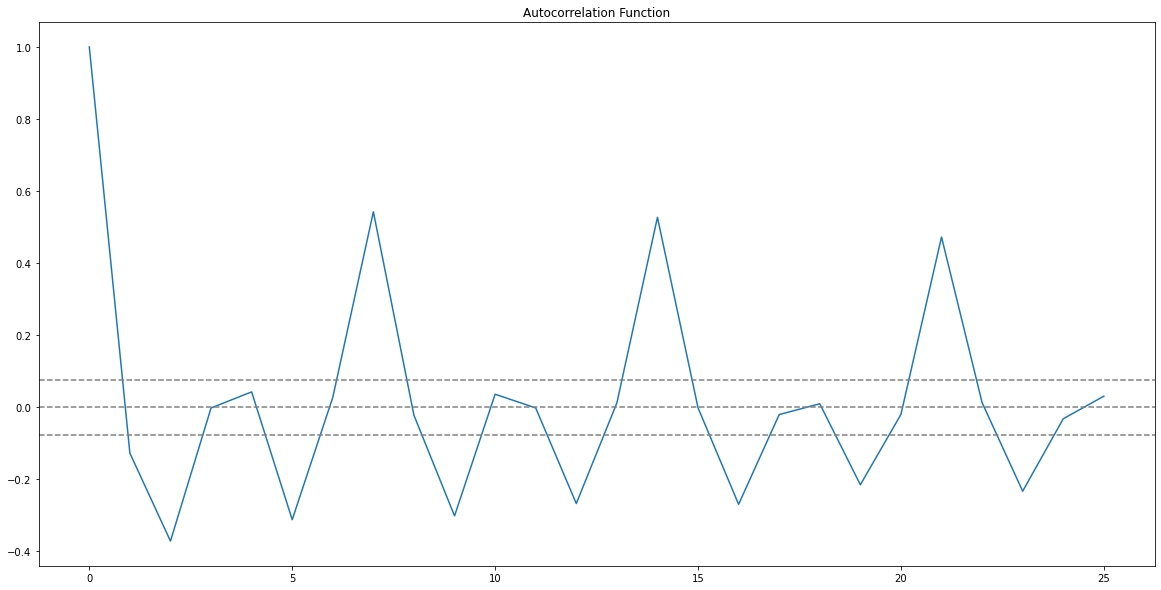

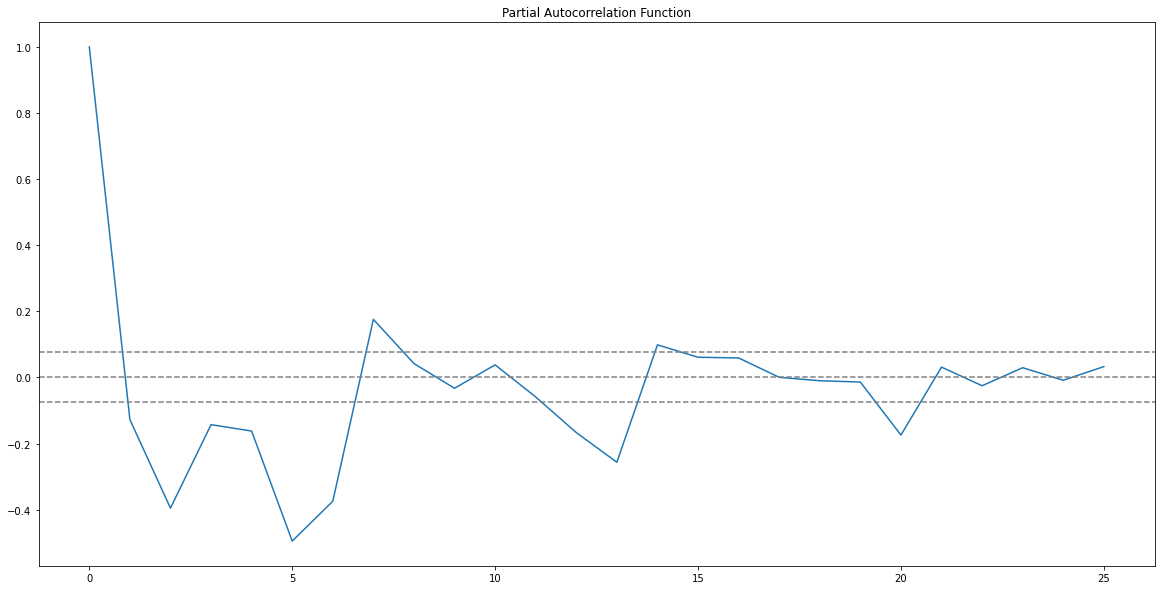

In [95]:
plt.plot(lag_acf)

plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle="--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle="--", color="gray")
plt.title("Autocorrelation Function")
plt.show()

plt.plot(lag_pacf)
plt.axhline(y=0, linestyle="--", color="gray")
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle="--", color="gray")
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle="--", color="gray")
plt.title("Partial Autocorrelation Function")
plt.show()

### AR Model

In [67]:
from statsmodels.tsa.arima_model import ARIMA

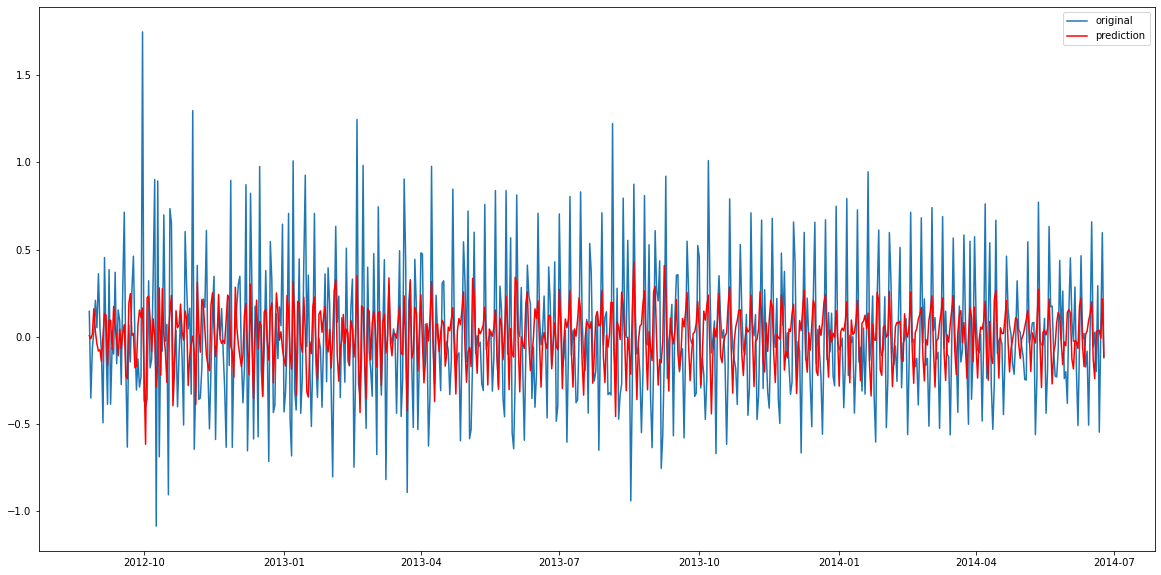

In [68]:
model = ARIMA(Train_log, order=(2,1,0)) # q value = 0
results_AR = model.fit(disp=-1)

plt.plot(train_log_diff.dropna(), label="original")
plt.plot(results_AR.fittedvalues, color="red", label="prediction")

plt.legend(loc="best")
plt.show()

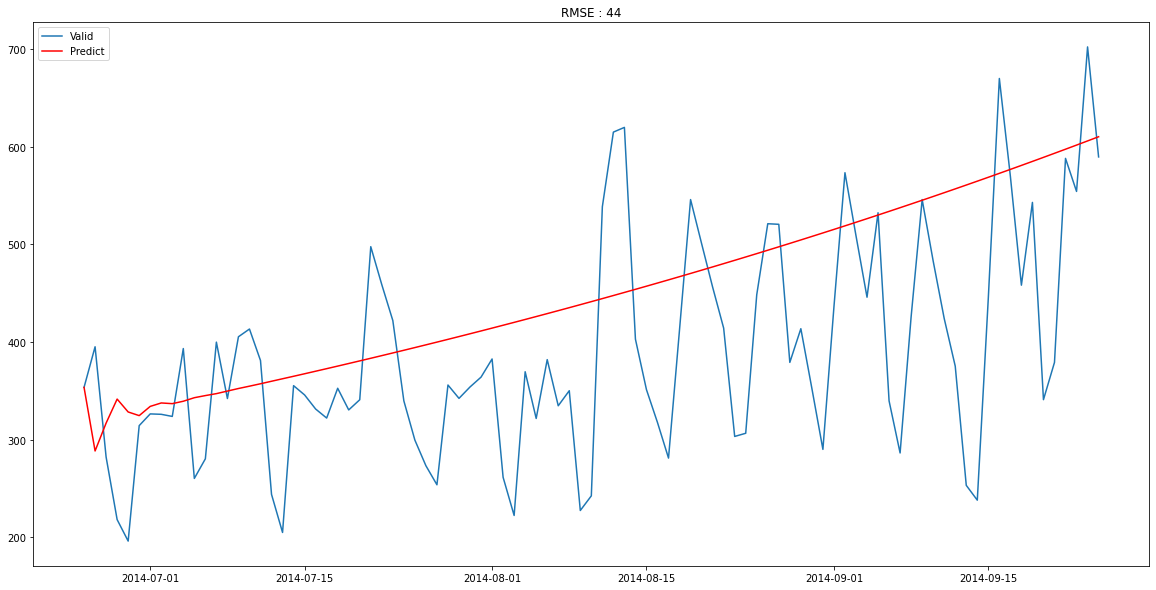

In [96]:
AR_predict = results_AR.predict(start="2014-06-25", end="2014-09-25")
AR_predict = AR_predict.cumsum().shift().fillna(0)

AR_predict1= pd.Series(np.ones(valid.shape[0]) * np.log(valid["Count"])[0], index=valid.index)
AR_predict1 = AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)


plt.plot(valid["Count"], label="Valid")
plt.plot(AR_predict, color="red", label="Predict")

plt.legend(loc="best")
plt.title("RMSE : %.f"% (np.sqrt(np.dot(AR_predict, valid["Count"]))/ valid.shape[0]))
plt.show()

### MA Model

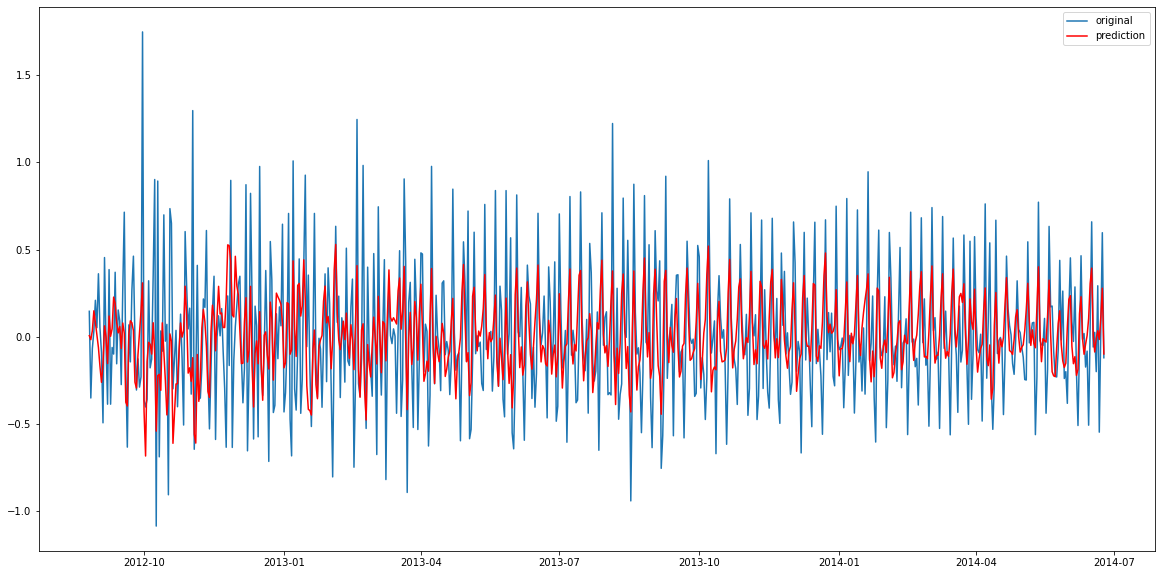

In [70]:
model = ARIMA(Train_log, order=(0,1,2)) # P Value = 0
results_MA = model.fit(disp=-1)

plt.plot(train_log_diff.dropna(), label="original")
plt.plot(results_MA.fittedvalues, color="red", label="prediction")
plt.legend(loc="best")
plt.show()

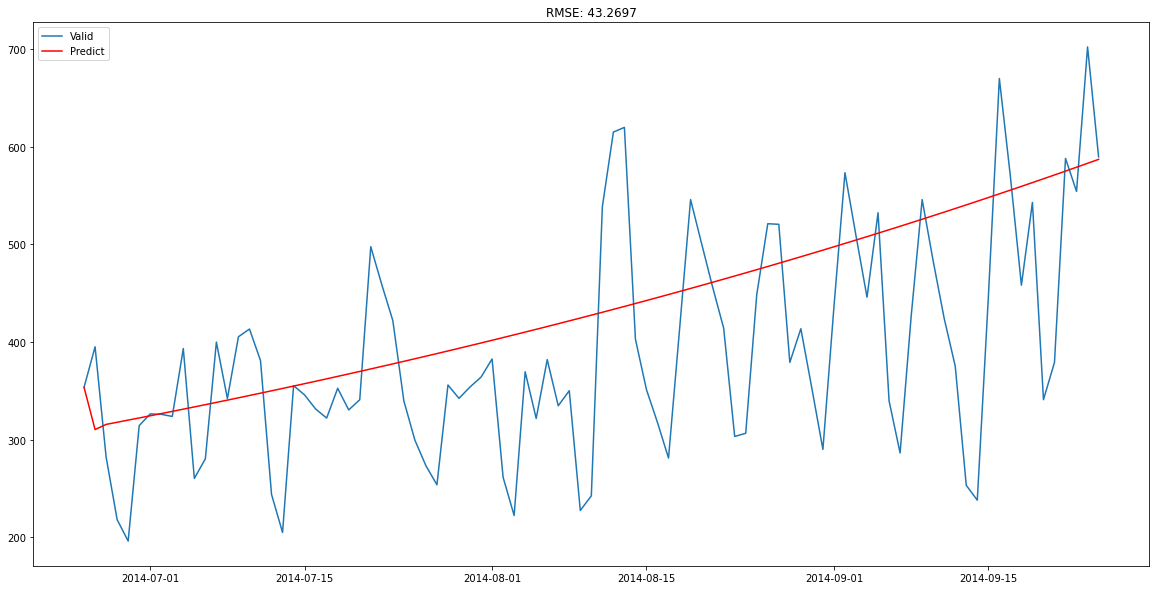

In [97]:
MA_predict = results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict = MA_predict.cumsum().shift().fillna(0)

MA_predict1 = pd.Series(np.ones(valid.shape[0]) * np.log(valid["Count"])[0], index=valid.index)
MA_predict1 = MA_predict1.add(MA_predict,fill_value=0)

MA_predict = np.exp(MA_predict1)

plt.plot(valid["Count"], label="Valid")
plt.plot(MA_predict, color="red", label = "Predict")
plt.legend(loc="best")

plt.title("RMSE: %.4f"% (np.sqrt(np.dot(MA_predict,valid["Count"])) / valid.shape[0]))
plt.show()

### Combined Model

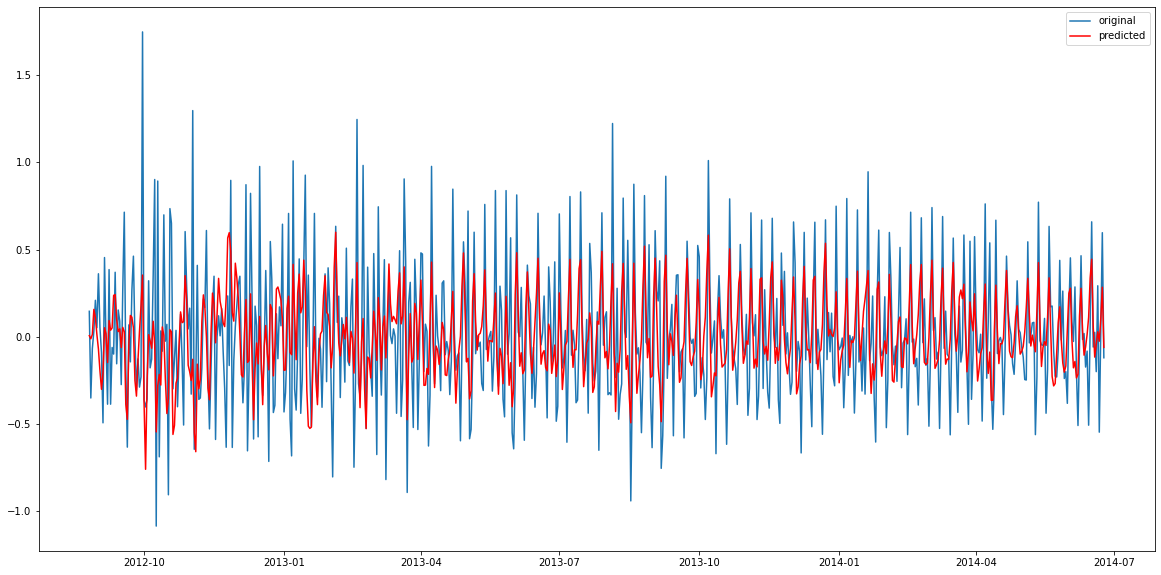

In [72]:
model = ARIMA(Train_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)

plt.plot(train_log_diff.dropna(), label="original")
plt.plot(results_ARIMA.fittedvalues, color="red", label="predicted")

plt.legend(loc="best")
plt.show()

In [73]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff = predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set["Count"])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff, fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set["Count"], label="Given set")
    plt.plot(predict, color="red", label = "Predict")
    plt.legend(loc="best")
    plt.title("RMSE: %.4f"% (np.sqrt(np.dot(predict,given_set["Count"]))/ given_set.shape[0]))
    plt.show


def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set["Count"], label="Given set")
    plt.plot(predict, color="red", label="Predict")
    plt.legend(loc="best")
    plt.title("RMSE: %.4f"% (np.sqrt(np.dot(predict,given_set["Count"])) / given_set.shape[0]))
    plt.show()

    

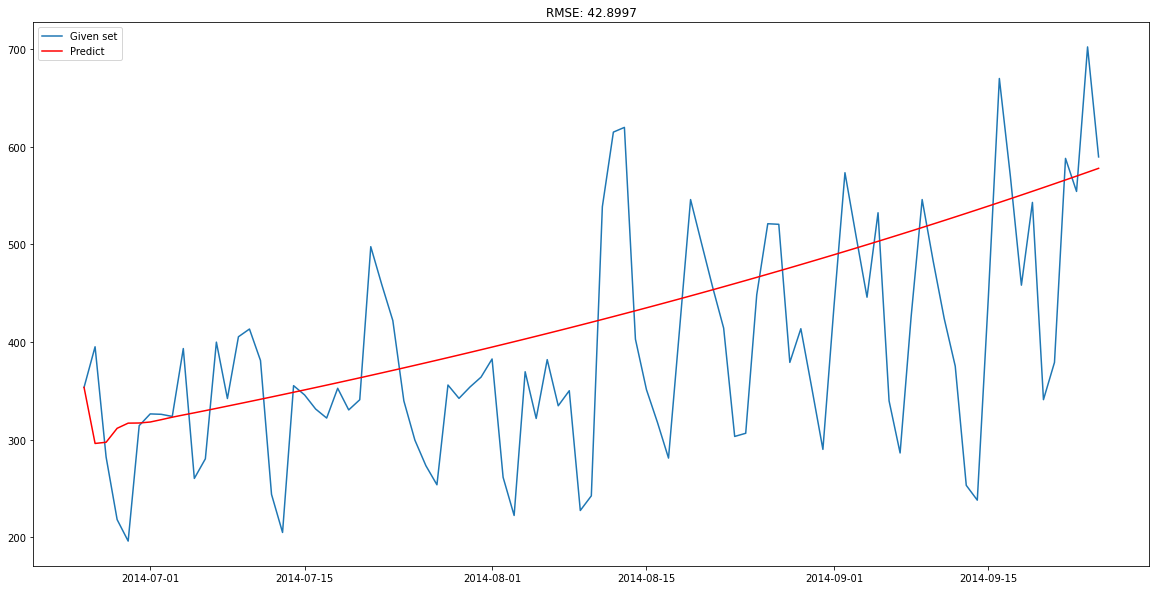

In [74]:
ARIMA_predict_diff = results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, valid)

## SARIMAX Model on Daily Time Series

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59397D+00    |proj g|=  6.76341D-02

At iterate    5    f=  4.56367D+00    |proj g|=  1.38791D-02


 This problem is unconstrained.



At iterate   10    f=  4.51060D+00    |proj g|=  6.26802D-02

At iterate   15    f=  4.49967D+00    |proj g|=  2.46043D-03

At iterate   20    f=  4.49390D+00    |proj g|=  1.86532D-02

At iterate   25    f=  4.49173D+00    |proj g|=  4.70221D-03

At iterate   30    f=  4.49124D+00    |proj g|=  5.92908D-04

At iterate   35    f=  4.49124D+00    |proj g|=  2.60245D-04

At iterate   40    f=  4.49117D+00    |proj g|=  2.33526D-03

At iterate   45    f=  4.49098D+00    |proj g|=  1.68728D-03

At iterate   50    f=  4.49086D+00    |proj g|=  2.23436D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63   

/Users/johndalevacaro/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


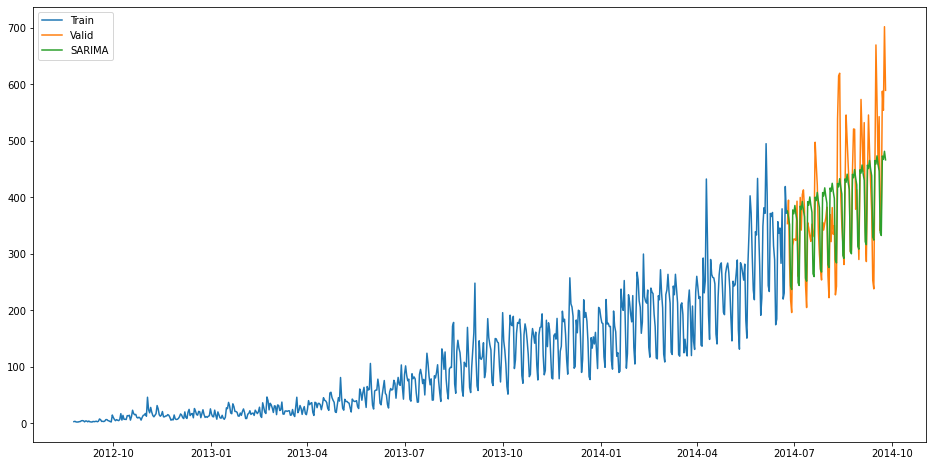

In [76]:
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2,1,4), seasonal_order= (0,1,1,7)).fit()

y_hat_avg["SARIMA"] = fit1.predict(start="2014-06-25", end="2014-09-25", dynamic=True)

plt.figure(figsize=(16,8))
plt.plot(Train["Count"], label="Train")
plt.plot(valid["Count"] , label="Valid")
plt.plot(y_hat_avg["SARIMA"], label="SARIMA")


plt.legend(loc="best")
plt.show()

In [77]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA))
rms

69.74542332466008

In [78]:
predict = fit1.predict(start="2014-09-26", end="2015-04-26", dynamic=True)

test["prediction"] = predict

merge=pd.merge(test,test_original, on=("day", "month", "year"),how="left")
merge["Hour"] = merge["Hour_y"]

merge = merge.drop(["year","month","Datetime", "Hour_x", "Hour_y"],axis=1)

/Users/johndalevacaro/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [80]:
prediciton = pd.merge(merge, temp2, on="Hour", how="left")

In [98]:
prediction["Count"] = prediction["prediction"] * prediction["ratio"] * 24
prediction["ID"] = prediction["ID_y"]
submission = prediction.drop(["day", "Hour", "ratio", "prediction", "ID_x", "ID_y"], axis=1)

pd.DataFrame(submission, columns=["ID","Count"]).to_csv("SARIMAX.csv")